<a href="https://colab.research.google.com/github/Mohammadhsiavash/DeepL-Training/blob/main/Computer%20Vision/License_Plate_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Automatically detect the location of license plates in an image and optionally extract
the plate number using OCR.

In [1]:
!pip install opencv-python easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

Load and Preprocess Image

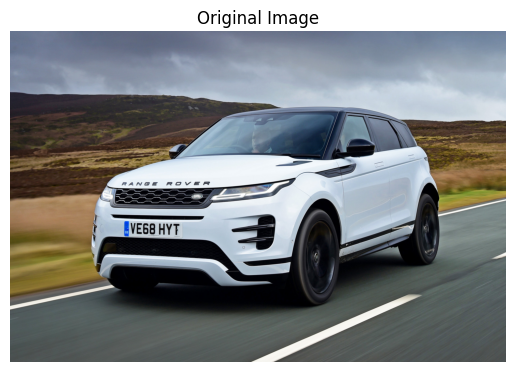

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load image
# cv2.imread cannot read from a URL directly, so use VideoCapture
cap = cv2.VideoCapture("https://media.autoexpress.co.uk/image/private/s--CvlTO-6z--/v1563182800/autoexpress/2019/02/01_21.jpg")
ret, img = cap.read()
cap.release()

if ret:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Display original image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
else:
    print("Error: Could not load image from URL.")

## Define a function for license plate detection and ocr



In [4]:
import easyocr
import re

def detect_license_plates(image):
    """
    Detects potential license plates in an image using EasyOCR.

    Args:
        image: A NumPy array representing the input image.

    Returns:
        A list of dictionaries, where each dictionary contains the bounding box
        and the extracted text for each potential license plate.
    """
    reader = easyocr.Reader(['en'])
    results = reader.readtext(image)

    potential_plates = []
    for (bbox, text, prob) in results:
        # Calculate aspect ratio
        (top_left, top_right, bottom_right, bottom_left) = bbox
        width = np.linalg.norm(np.array(top_right) - np.array(top_left))
        height = np.linalg.norm(np.array(bottom_left) - np.array(top_left))

        if height == 0:
            continue # Avoid division by zero

        aspect_ratio = width / height

        # Simple filtering based on aspect ratio (typical license plates have aspect ratios > 2)
        if aspect_ratio > 2:
            potential_plates.append({'bbox': bbox, 'text': text})

    return potential_plates

# Example usage with the loaded image
if ret:
    detected_plates = detect_license_plates(gray)
    print("Detected potential license plates:")
    for plate in detected_plates:
        print(f"  Bounding Box: {plate['bbox']}, Text: {plate['text']}")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteDetected potential license plates:
  Bounding Box: [[np.int32(537), np.int32(725)], [np.int32(715), np.int32(725)], [np.int32(715), np.int32(749)], [np.int32(537), np.int32(749)]], Text: RAn0E
  Bounding Box: [[np.int32(753), np.int32(721)], [np.int32(972), np.int32(721)], [np.int32(972), np.int32(753)], [np.int32(753), np.int32(753)]], Text: R 0V E R
  Bounding Box: [[np.int32(572), np.int32(917)], [np.int32(831), np.int32(917)], [np.int32(831), np.int32(996)], [np.int32(572), np.int32(996)]], Text: VE68 HYT


## Apply the function to the image



In [5]:
detected_plates = detect_license_plates(gray)

## Visualize the results


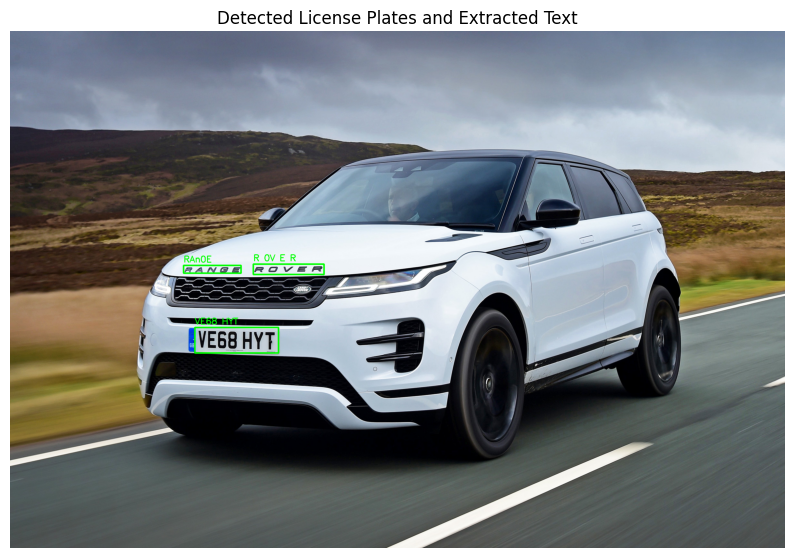

In [6]:
for plate in detected_plates:
    bbox = np.array(plate['bbox'], dtype=np.int32)
    text = plate['text']

    # Draw bounding box
    cv2.polylines(img, [bbox], True, (0, 255, 0), 3)

    # Add text
    cv2.putText(img, text, (bbox[0][0], bbox[0][1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Detected License Plates and Extracted Text")
plt.axis('off')
plt.show()